## World Population Calculation - using Decision Tree/ Random Forest/ Linear Regression

## Trying Decision Tree Regression First

In [277]:
### Import Libraries
import pandas as pd

In [278]:
### Reading the CSV
T1=pd.read_csv("population 2.csv")

In [279]:
### Checking no of rows and columns
T1.shape

(24, 13)

In [280]:
### Checking the Data
T1.head()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322


In [281]:
### Correlation Matrix
cor=T1.corr()

In [327]:
### Importing libraries for visualization
import matplotlib.pyplot as mlt
import seaborn as sns

<AxesSubplot:>

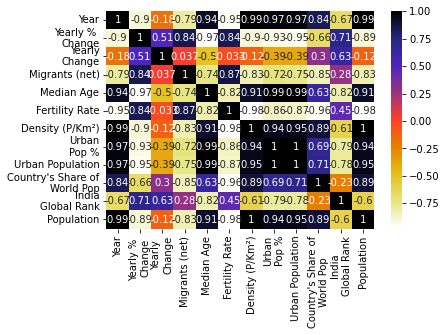

In [283]:
### Correlation Graph
sns.heatmap(cor,annot=True,cmap=mlt.cm.CMRmap_r)

In [284]:
### Function defining for extracting correlated features (Source Code from : Krish Naik's ML Playlist)
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
               colname=corr_matrix.columns[i]
               col_corr.add(colname)
    return col_corr
        
    

In [285]:
### Calling the function to extract variables to be removed ( If two variables are highly correlated, it retains only one and extract the other one)
cor_features=correlation(T1,0.8)

In [286]:
### Checking tge length
len(cor_features)

10

In [287]:
### Checking out Correlated Variables
cor_features

{"Country's Share of\nWorld Pop",
 'Density (P/Km²)',
 'Fertility Rate',
 'India\nGlobal Rank',
 'Median Age',
 'Migrants (net)',
 'Population',
 'Urban\nPop %',
 'Urban Population',
 'Yearly % \nChange'}

In [288]:
### Dropping out correlated variables 
T2=T1.drop(cor_features,axis=1)

In [289]:
### Final Dataset
T2.head()

,Year,Yearly\nChange,World Population
0,2050,3711367,9735033990
1,2045,5585537,9481803274
2,2040,7793541,9198847240
3,2035,10016298,8887524213
4,2030,11726140,8548487400


In [290]:
### Checking one value in a column (Instead of this value 2773019936, it was mentioned 2,77,30,19,936. in the dataset)
T2[T2['World Population'].str.contains(r'2,77(?!$)')] 

,Year,Yearly\nChange,World Population
23,1955,6711079,"2,77,30,19,936"


In [291]:
### Replacing a value with the right one
T2['World Population']= T2['World Population'].str.replace("2,77,30,19,936","2773019936")

In [292]:
### Changing the Datatypes As fit function will not accept string values in regression
T2['Year']=T2['Year'].astype(float)
T2['Yearly\nChange']=T2['Yearly\nChange'].astype(float)
T2['World Population']=T2['World Population'].astype(float)

In [293]:
### Loading Libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [294]:
### Train and Test Split
x= T2.values[:,0:2]
y=T2.values[:,2]
x_train,y_train,x_test,y_test= train_test_split(x,y,test_size=0.2)

In [295]:
### Checking the no of rows and columns in the numpy array of train and test after split
x_train.shape

(19, 2)

In [296]:
x_test.shape

(19,)

In [297]:
y_train.shape

(5, 2)

In [298]:
y_test.shape

(5,)

In [299]:
### Loading Numpy Library for MAPE Function
import numpy as np

In [300]:
### Decision Tree Regression Model
clfr = DecisionTreeRegressor(max_depth=2).fit(x_train,x_test)

In [301]:
### Prediction for Test Values
Predictions=clfr.predict(y_train)

In [302]:
### Defining MAPE
def MAPE(truevalues,predictions):
    mape = np.mean(np.abs((test.iloc[:,2] - Predictions)/ test.iloc[:,2]))
    return mape

In [303]:
### Calculating Accuracy using MAPE
MAPE(y_test,Predictions)*100

40.45311774943887

In [304]:
### Changing train and test samples to improve some accuracy

In [305]:
x,y = train_test_split(T2,test_size=0.2)

In [306]:
clfr1 = DecisionTreeRegressor(max_depth=2).fit(x.iloc[:,0:2],x.iloc[:,2])

In [307]:
Predictions1 = clfr1.predict(y.iloc[:,0:2])

In [ ]:
### Calculating Accuracy

In [308]:
MAPE(y.iloc[:,2],Predictions1)*100

40.45311774943887

## Trying Random Forest Regression as Decision Tree Regression accuracy is low

In [309]:
### Import Library
from sklearn.ensemble import RandomForestRegressor

In [310]:
### Build Random Forest
clfr_RF = RandomForestRegressor(n_estimators=100).fit(x_train,x_test)

In [311]:
### Predict Test Cases
RF_Predictions=clfr_RF.predict(y_train)

In [312]:
### Calculate Accuracy
MAPE(y_test,RF_Predictions)*100

40.45311774943887

In [313]:
### Changing the train and test split- DIfferent samples to improve some accuracy 

In [314]:
x,y = train_test_split(T2,test_size=0.2)

In [315]:
clfr_RF1 = RandomForestRegressor(n_estimators=100).fit(x.iloc[:,0:2],x.iloc[:,2])

In [316]:
RF_Predictions1 = clfr_RF1.predict(y.iloc[:,0:2])

In [ ]:
### Calculating Accuracy

In [317]:
MAPE(y.iloc[:,2],RF_Predictions1)*100

40.45311774943887

## Trying Linear Regression As DecisionTree and RandomForest giving same low accuracy 

In [336]:
### Import Library
import statsmodels.api as sm

## Scatter Plot between Target Variable(World Population) and Independent Variable(Yearly Change)

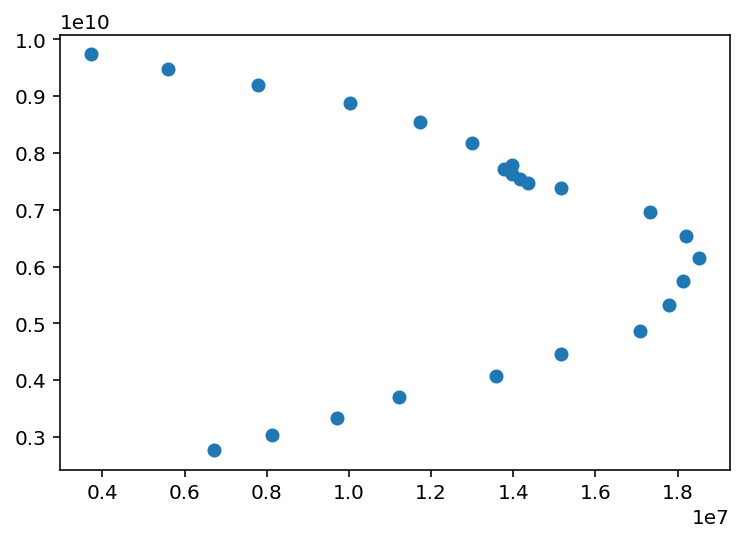

In [331]:
mlt.scatter(T2['Yearly\nChange'],T2['World Population'])

## Scatter Plot between Target Variable(World Population) and Another Independent Variable( Finding Linear Line Between)

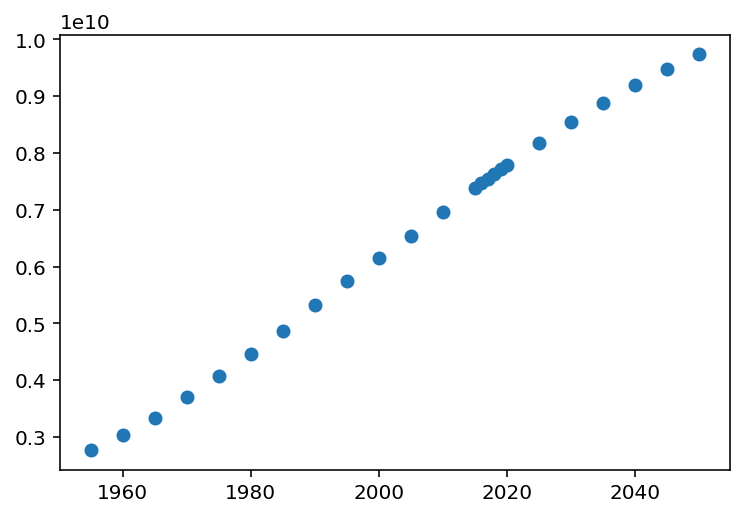

In [332]:
mlt.scatter(T2['Year'],T2['World Population'])

## We see a linear line between year and World Population variable, so we take these two and try to implement Linear Regression

## Linear Regression

In [334]:
### Dropping unncessary variable
T3 = T2.drop('Yearly\nChange',axis=1)

In [335]:
T3.head()

,Year,World Population
0,2050.0,9.735034e+09
1,2045.0,9.481803e+09
2,2040.0,9.198847e+09
3,2035.0,8.887524e+09
4,2030.0,8.548487e+09


In [337]:
### Train/test split
train, test = train_test_split(T3,test_size=0.2)

In [339]:
### Building Linear Regression Model
Model = sm.OLS(train.iloc[:,0:1],train.iloc[:,1]).fit()

In [340]:
### Checking the Model
Model.summary()

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Year   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              171.8
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    1.20e-10
Time:                        16:44:30   Log-Likelihood:                         -149.05
No. Observations:                  19   AIC:                                      300.1
Df Residuals:                      18   BIC:                                      301.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
World Population  2.762e-07   2.11e-08     13.106      0.000    2.32e-07    3.21e-07
==============================================================================
Omnibus:                        3.099   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.511
Skew:                           0.352   Prob(JB):                        0.470
Kurtosis:                       1.811   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
### Predicting test cases
Predictions_LR = Model.predict(test.iloc[:,0:1])

In [344]:
Predictions_LR

14    0.000552
18    0.000547
16    0.000550
4     0.000561
6     0.000558
dtype: float64

In [365]:
### Calculating Accuracy
Accuracy=np.mean(np.abs((test.iloc[:,1] - Predictions_LR)/ test.iloc[:,1]))*100

In [366]:
Accuracy

99.99999999999093

In [ ]:
### With Linear Regression, we get high Accuracy, so the best fit could be Linear Regression